<h1>Pokemon Analysis:</h1>
<p><a href='https://www.kaggle.com/abcsds/pokemon/downloads/Pokemon.csv/2'>Dataset Link</a></p>
<p>Se você já pensou em que Pokemons escolher inicialmente, qual estratégia de time seguir, qual a vantagem de certos tipos em relação a outros entre outras análises, <b>welcome</b>.</p>

<p>Colunas:</p>
<ul>
    <li>Name: Nome dos pokemons</li>
    <li>Type: Os pokemons podem ter até dois tipos, a coluna Type 1 é o tipo principal do pokemon. Type 2 caso o mesmo possua mais de um tipo.</li>
    <li>Total: Soma de todos os atributos daquele pokemon.</li>
    <li>HP: Hit Points - Pontos de Vida.</li>
    <li>Attack: Pontos de Ataque.</li>
    <li>Defense: Pontos de Defesa.</li>
    <li>Sp. Atk: Special Attack - Pontos de Ataque Especial (ataques psíquicos, elementais)</li>
    <li>Sp. Def: Special Defense - Pontos de Defesa Especial</li>
    <li>Speed: Velocidade (decide que pokemon ataca primeiro)</li>
    <li>Generation: Geração daquele pokemon</li>
    <li>Legendary: Lendário</li>
</ul>

In [4]:
# Collor palette for each pokemon's type
colors_type = {
    'Bug': '#226022',
    'Dark': '#19164C',
    'Dragon': '#895FA9',
    'Electric': '#FFEC02',
    'Fairy':'#F267A4',
    'Fighting': '#631D1D',
    'Fire': '#F8001D',
    'Flying': '#3B00CD',
    'Ghost': '#670898',
    'Grass': '#1FE300',
    'Ground': '#E47700',
    'Ice': '#0C4D95',
    'Normal': '#7B4848',
    'Poison':'#BC00B4',
    'Psychic': '#B84891',
    'Rock': '#413D5A',
    'Steel': '#666B9D',
    'Water': '#1D9BFB'
}

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import warnings
from math import pi
%matplotlib inline
warnings.filterwarnings("ignore")

In [192]:
dataset = pd.read_csv('Pokemon.csv')
dataset = dataset.drop(columns = ['#']) # a coluna '#' não isola bem os pokemons, visto que alguns valores se repetem
dataset.Name.replace(re.compile("^.*Mega"), "Mega", inplace=True) # Removendo nomes repetidos nas evoluções Mega
dataset.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<h1>Tipos de Pokemons</h1>

<p>Como vimos anteriormente, os pokemons são divididos em tipos. Além disso cada pokemon pode possuir um ou dois tipos. Uma análise que pode ser feita sobre isso é saber quais os tipos mais comuns e analisar vantagens e desvantagens de cada tipo.</p>

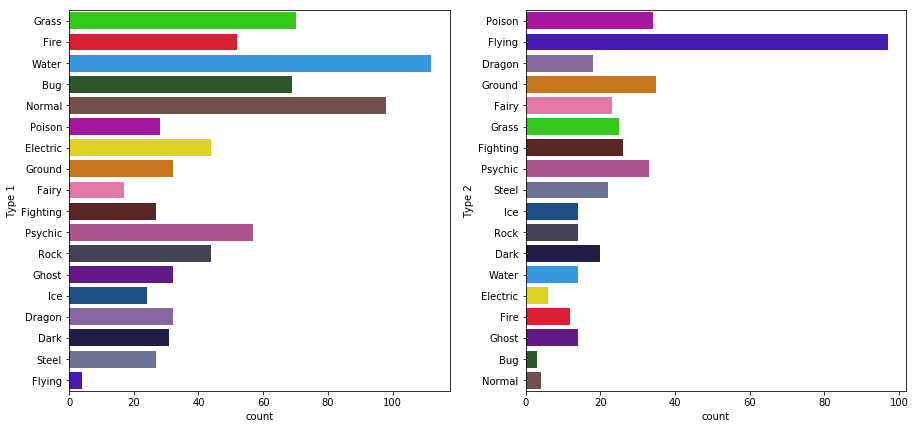

In [80]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.countplot(y = 'Type 1', data = dataset, palette=colors_type)
plt.subplot(122)
sns.countplot(y = 'Type 2', data = dataset, palette=colors_type)
plt.show()

<p>Como podemos ver nos gráficos acima, provavelmente é uma surpresa notar que o tipo de pokemon mais comun é o tipo Aquático. Uma outra análise mostra que o tipo secundário mais comum é o Voador.</p> 
<p>Alguns insights:</p>
<ul>
    <li>Como a maioria dos pokemons são do tipo água, os mesmo do tipo Elétrico, e Grama possuem uma vantagem estatística. É mais provável que um jogador enfrente mais pokemons aquáticos.</li>
    <li>Pokemons voadores são bem mais frequentes no segundo tipo. Analisando isso podemos dizer que uma grande parte dos pokemons são também do tipo voador, dando vantagem a pokemons do tipo elétrico.</li>
</ul>

<h1>Distribuição de Atributos</h1>

<p>Em uma primeira análise podemos pensar "quais são os tipos que tem vantagens em atributos?". Para isso podemos buscar a média de cada atributo agrupado por tipo e gerar gráficos que explorem cada um desses atributos.

<h3>Análise Geral dos Atributos</h3>

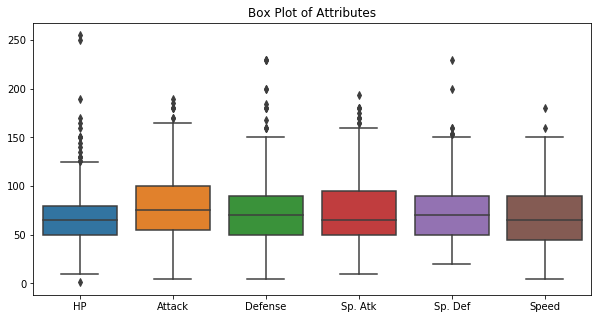

In [81]:
# Criando um dataframe "pokemons" que mostra apenas os pokemons e seus status
pokemons = dataset.drop(columns = ['Total', 'Generation', 'Legendary'])
plt.figure(figsize = (10,5))
ax = sns.boxplot(data=pokemons)
ax.set_title('Box Plot of Attributes')
plt.show()

<p>Aqui notamos como cada atributo se comporta. Notamos principalmente o número de outliers dos atributos HP e Defesa; principalmente HP, onde os dados são distribuidos "normalmente", mas o excesso de outliers mostra que esse é um atributo mais inconstante (HP acima de 200 são os outliers mais chamativos). Vemos também que o atributo Ataque Especial tem uma variação de quartis bastante interessante. O segundo quartil foi o que menos variou: 25% dos pokemons possuem esse atributo entre 50 e 60. Já o terceiro quartil foi o que mais variou entre todos os outros atributos: 25% dos pokemons se possuem esse atributo entre 60 e 100.</p>

<p>Para uma melhor explicação sobre Box Plot:</p>
<img src="box-plot-explained.gif" style='margin-left:0%'>
<a href='https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/'>
    <p>https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/</p>
</a>

<h3>Encontrando os Outliers</h3>

<p>Como visto anteriormente, vários atributos possuem muitos outliers, especialmente o HP. Então começamos buscando quem são esses pokemons.</p>
<p style="color:red">OBS: em algumas análises muitos desses "top pokemons" são lendários, então preferi excluí-los. Adiante terá uma análise dos pokemons raros.</p>

In [247]:
# Método para retornar um dataset com o top x pokemons, onde x é definido pelo usuário, baseado em atributos
# É possível também não priorizar lendários
# É possível também filtrar em apenas lendários ou não
def findTopByAttr(dataframe, attrs, legendaryPriority = True, top = 5, 
                  filterLegendary = None, filterMega = None, filterMode = None):
    toQuery = dataframe
    if filterLegendary != None:
        toQuery = toQuery[dataframe['Legendary'] == filterLegendary]
    mask_ascending = list(np.zeros_like(attrs, dtype=np.bool))
    if filterMega != None:
        # Criei uma lambda function para filtrar apenas pokemon sem o nome Mega para limpar algumas consultas
        toQuery = toQuery[lambda df: [not (filterMega ^ bool(re.search('^(Mega)', name))) for name in df['Name']]]
    if filterMode != None:
        toQuery = toQuery[lambda df: [not (filterMode ^ bool(re.search('(Mode$)', name))) for name in df['Name']]]
    if legendaryPriority:
        attrs = ['Legendary'] + attrs
        mask_ascending = [True] + mask_ascending
    top_dataframe = toQuery.sort_values(by= attrs, ascending=mask_ascending).head(top)
    return top_dataframe

<h4>Pokemons Normais:</h4>

<h5>Top 5 HP:</h5>

In [248]:
findTopByAttr(dataset, ['HP'], filterMega=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


In [261]:
findTopByAttr(dataset, ['Attack'], filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
454,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
313,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
750,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
673,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False
515,Rhyperior,Ground,Rock,535,115,140,130,55,55,40,4,False


In [250]:
findTopByAttr(dataset, ['Defense'], filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
789,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
98,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
332,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False


In [259]:
findTopByAttr(dataset, ['Sp. Atk'], filterMega = False, filterMode = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
750,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
670,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False
70,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False
525,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False
698,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False


In [258]:
findTopByAttr(dataset, ['Sp. Def'], filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
739,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False
528,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False
751,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False
773,Carbink,Rock,Fairy,500,50,50,150,50,150,50,6,False


In [254]:
findTopByAttr(dataset, ['Speed'], filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
678,Accelgor,Bug,NaN,495,80,70,40,100,60,145,5,False
109,Electrode,Electric,NaN,480,60,50,70,80,80,140,1,False
146,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False
153,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False


<p>A partir das queries acima temos os 5 maiores outliers de cada atributo (excluindo as formas Mega e os Lendário). A partir dessas tabelas já podemos ter algumas ideias de pokemons que podemos escolher para o time.</p>
<ul>
    <li>Alakazam é um pokemon da primeira geração com um poderoso Ataque Especial e com HP, Velocidade e Defesa Especial interessantemente altos</li>
    <li>Para possuir um pokemon de "recuperação", Blissey possui o maior HP do jogo (de longe, junto com sua pré-evolução) e uma boa Defesa Especial. Só é preciso ter cuidado com pokemons de Ataque Físico</li>
    <li>Steelix é uma ótima opção de Defesa, além de possuir os outros atributos relativamente equilibrados.</li>
</ul>
<p style="color:red">OBS: Mode e Mega foram retirados. Forme foi mantido por ser um atributo do pokemon em si.</p>

<h4>Adicionando Pokemons Lendários:</h4>

In [268]:
findTopByAttr(dataset, ['HP'], legendaryPriority=False ,filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


In [269]:
findTopByAttr(dataset, ['Attack'], legendaryPriority=False ,filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
429,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
454,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
313,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


In [270]:
findTopByAttr(dataset, ['Defense'], legendaryPriority=False ,filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
414,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
789,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
332,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False


In [271]:
findTopByAttr(dataset, ['Sp. Atk'], legendaryPriority=False ,filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
429,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
712,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
162,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [272]:
findTopByAttr(dataset, ['Sp. Def'], legendaryPriority=False ,filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
415,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
430,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
739,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False


In [273]:
findTopByAttr(dataset, ['Speed'], legendaryPriority=False ,filterMega = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
429,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
428,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
678,Accelgor,Bug,NaN,495,80,70,40,100,60,145,5,False


<h3>Matriz de Correlação Entre Atributos</h3>

<p>Matriz de correlação é uma matriz que mede a correlação entre atributos de uma tabela. Quanto mais próximo (correlacionado) um atributo for de um, mais próximo o valor entre eles é de 1.0. Se o valor for próximo de -1.0, esses atributos são opostos (enquanto um cresce, o outro decresce).</p>

In [7]:
# Criando uma matriz de correlação dos atributos de cada pokemon
corr_matrix = pokemons.corr()
# Criando uma máscara para a matriz de correlação. A mesma é triangular, então nos interessa apenas metade da matriz
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

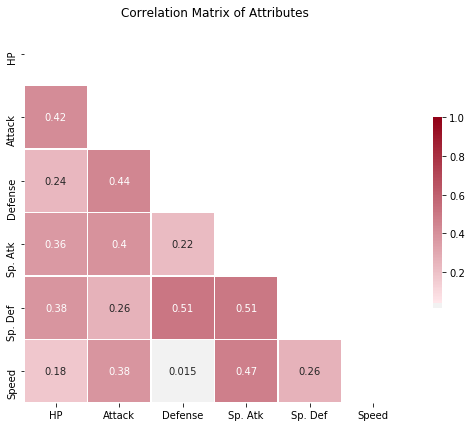

In [8]:
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(220, 10, s = 99, l = 30, as_cmap=True)
ax = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_title('Correlation Matrix of Attributes')
plt.show()

<p>Como é possível imaginar, não existe uma correlação ~1.0 entre os atributos, mas podemos notar um certo grau de correlação entre os atributos: Defesa Especial e Defesa, Defesa Especial, Ataque Especial e Ataque e HP.</p>
<p>Supondo uma boa correlação aquela > 0.4:</p>
<ul>
    <li>Pokemons focados em Defesa Especial podem possuir um bom Ataque Especial e Defesa.</li>
    <li>Pokemons focados em Ataque físico podem possuir uma boa Defesa e HP</li>
    <li>Pokemons focados em Ataque Especial podem possuir uma boa Velocidade</li>
</ul>

<h3>Análise dos Atributos por Tipo:</h3>

In [8]:
# Criando uma lista com os tipos de pokemons e uma variável com o comprimento desta última.
attrs = list(dataset)[4:10]
n_attrs = len(attrs)

In [9]:
# Para analisar ambos Type 1 e Type 2:
# Primeiro agrupei o dataset por tipos e somei todos os atributos
sum_by_type1 = dataset.groupby(by = ['Type 1'])[attrs].sum()
sum_by_type2 = dataset.groupby(by = ['Type 2'])[attrs].sum()
# Fiz mais dois datasets agrupados por tipos e contei quantas aparições aquele atributo possui
count_by_type1 = dataset.groupby(by = ['Type 1'])[attrs].count()
count_by_type2 = dataset.groupby(by = ['Type 2'])[attrs].count()
# Com a soma e o número de aparições, somei os dataframes de soma e dividi pela soma do dataframe de frequência,
# gerando a média por atributo.
mean_by_type = (sum_by_type1 + sum_by_type2)/(count_by_type1 + count_by_type2)

In [11]:
mean_by_type

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.736111,71.763889,71.111111,53.569444,64.666667,61.680556
Dark,70.235294,96.784314,70.941176,77.450980,69.647059,75.843137
Dragon,82.900000,105.760000,86.620000,97.440000,86.900000,82.140000
Electric,63.200000,69.520000,66.540000,88.960000,73.680000,82.940000
Fairy,68.475000,61.575000,70.400000,76.500000,83.125000,55.850000
Fighting,74.566038,104.660377,74.056604,66.924528,73.377358,76.528302
Fire,70.156250,84.109375,70.093750,93.000000,74.328125,75.421875
Flying,71.366337,80.227723,68.227723,76.366337,71.257426,86.386139
Ghost,62.826087,76.934783,81.521739,77.478261,76.956522,61.152174


<p>A partir do dataframe anterior temos a média dos atributos separados por tipos. Para facilitar a visualização, eu projetei um método que gera um gráfico em formato de radar onde cada ponta do mesmo é um atributo. Com esse método é possível gerar esse radar plot com um ou mais tipos.</p>

In [2]:
def radarPlot(types_to_analise, dataframe, figsize = (10,7)):        
    # Lista com features a serem analisadas
    attrs = list(dataframe)
    # Numero de features
    n_attrs = len(attrs) 
    # Ângulos a partir do eixo x de cada feature
    angles = [i/float(n_attrs) * 2 * pi for i in range(n_attrs)]
    angles += angles[0] # Eu devo repetir o primeiro ângulo para fechar o polígono dentro do gráfico
    plt.figure(figsize = figsize)
    ax = plt.subplot('111', polar = True)
    # Girar o gráfico 90º no sentido anti-horário
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Colocar o nome das features
    plt.xticks(angles[:-1], attrs, size=8)
    ax.set_rlabel_position(0)
    # Colocando linhas para mapear valores no eixo y (no caso temos eixos polares)
    plt.yticks([25.0, 50.0, 75.0, 100.0], ["25", "50", "75", "100"], size = 7, color="grey")
    plt.ylim(0,130)
    # Título do gráfico
    title = ''
    for t in types_to_analise:
        if title == '':
            title += t
        else:
            title += (' x ' + t)
        # values guardará os valores das features da linha "t"
        values = dataframe.loc[t].values.tolist()
        values += values[:1] # Assim como nos ângulos, repetimos aqui para fechar o polígono
        # Plotando as linhas
        ax.plot(angles, values, linewidth = 1, linestyle = 'solid', color=colors_type[t], label = t)
        # Pintando a área interna do polígono
        ax.fill(angles, values, colors_type[t], alpha=0.3)
        # Inserindo legendas
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    ax.set_title(title)

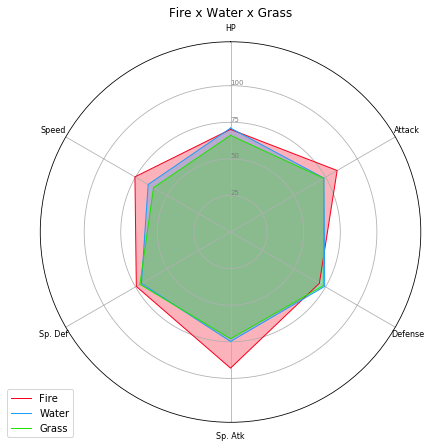

In [16]:
radarPlot(['Fire', 'Water', 'Grass'], mean_by_type)

<p>Sobre os 3 tipos de pokemon inicial podemos notar que fogo tem mais vantagem em Velocidade, Ataque Especial e Ataque. Já os pokemons de planta são mais equilibrados, ganhando por pouco em Ataque especial de água. Com essa análise poderíamos optar mais por pokemons de Fogo pois, provavelmente, seria o pokemon inicial mais forte.</p>

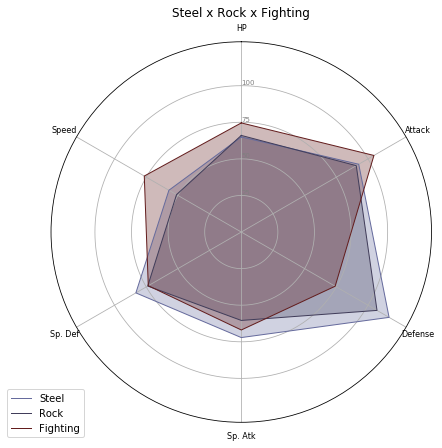

In [17]:
radarPlot(['Steel', 'Rock', 'Fighting'], mean_by_type)

<p style='color: red'>Um outlier que acabei encontrando enquando analisava o dataframe com as médias: se o usuário preza por uma defesa absurda (tanto física como especial), pokemons de aço são aqueles com a maior defesa do jogo. Comparando com os pokemons de mais "força bruta" (pedra, aço e lutador) notamos a diferença absurda da defesa dos de aço.</p>